Text(0.5, 0, 'wavelength [nm]')

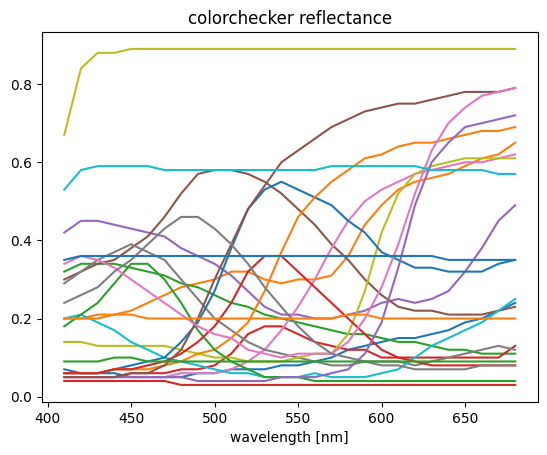

In [14]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches

# Replace 'file.csv' with the path to your CSV file
file_path = './dataset/MacbethColorChecker.csv'

# Read the CSV file and store it as a DataFrame
df = pd.read_csv(file_path, header=None, skiprows=2)

# Display the DataFrame

wvls_CC = df.values[1:,0]
wvls_CC = [float(x) for x in wvls_CC] 
ref_CC = df.values[1:,1:-2]

ind_min = 6
ind_max = 61
wvls_CC = wvls_CC[ind_min:ind_max:2] 
ref_CC = ref_CC[ind_min:ind_max:2,:]

# print(wvls_CC, ref_CC)

plt.figure()
plt.plot(wvls_CC, ref_CC)
plt.title('colorchecker reflectance')
plt.xlabel('wavelength [nm]')

In [15]:
ref_CC.shape, len(wvls_CC)

((28, 24), 28)

In [16]:
# arguments 
N = 40 # illum nums
R, C = 580, 890 # row, col
M = R*C # total pixel 
W = 25 # wavelength nums
P = 24 # patch nums

In [17]:
X_np_all = np.load('X_np_all_0509.npy')

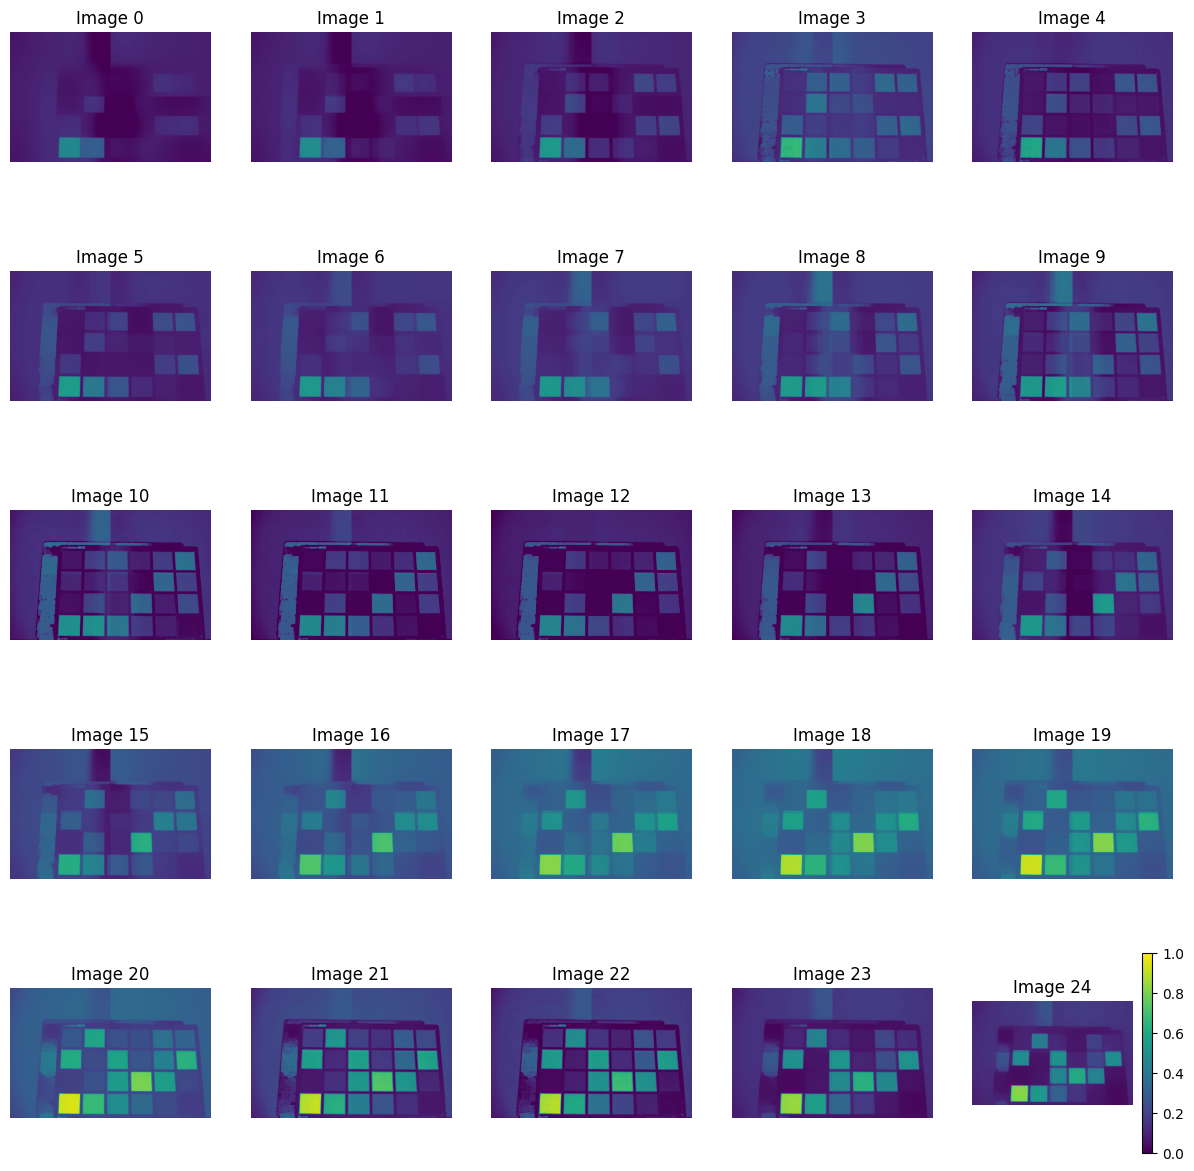

In [18]:
max_images_per_column = 5
num_columns = (W + max_images_per_column - 1) // max_images_per_column
plt.figure(figsize=(15, 3*num_columns))

for c in range(num_columns):
    start_index = c * max_images_per_column
    end_index = min(start_index + max_images_per_column, W)
    num_images = end_index - start_index
    
    for i in range(num_images):
        plt.subplot(num_columns, num_images, i + c * num_images + 1)
        plt.imshow(X_np_all[:, :, i + start_index], vmin=0, vmax=1)
        plt.axis('off')
        plt.title(f"Image {i + start_index}")
        
        if i + start_index == W - 1:
            plt.colorbar()

In [19]:
X_np_all.shape

(580, 890, 25)

In [20]:
# plot reflectance for each patches
# patches : 24개, wvl : 25 개

patches_reflectance = np.zeros(shape = (W, P))
patches_idx = np.load('./mid.npy')
p_size = 50

for p in range(P):
    for w in range(W):
        x_idx, y_idx = patches_idx[p][0], patches_idx[p][1]
        mean_ref = X_np_all[y_idx-p_size//2:y_idx+p_size//2,x_idx-p_size//2:x_idx+p_size//2, w].mean()
        patches_reflectance[w, p] = mean_ref

In [21]:
patches_idx.shape

(24, 2)

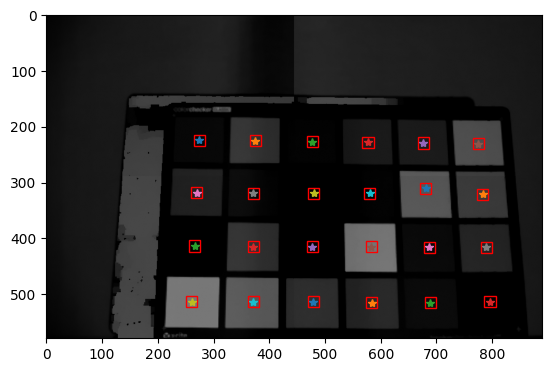

In [22]:
img = cv2.imread('./color_patch_13.png')/255.

fig, ax = plt.subplots()
for p in range(P):
    plt.plot(patches_idx[p][0],patches_idx[p][1], "*")
    ax.add_patch(patches.Rectangle([patches_idx[p][0]-p_size//2,patches_idx[p][1]-p_size//2], p_size, p_size, fill = False, edgecolor = 'red'))
    plt.imshow(img)

In [23]:
wvl_420_680 = list(np.arange(420, 670, 10))

In [24]:
patches_reflectance.shape

(25, 24)

In [25]:
len(wvl_420_680)

25

Text(0.5, 0, 'wavelength [nm]')

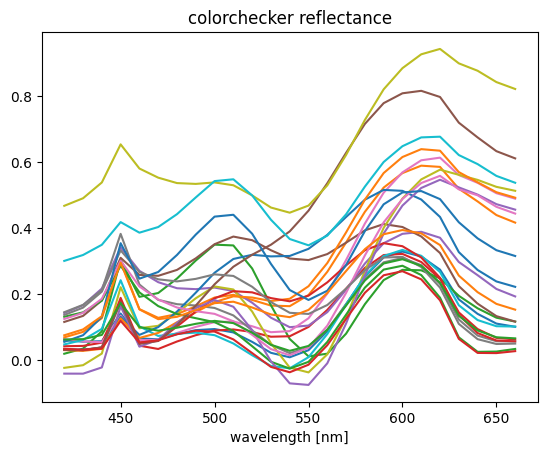

In [26]:
plt.figure()
plt.plot(wvl_420_680, patches_reflectance)
plt.title('colorchecker reflectance')
plt.xlabel('wavelength [nm]')